In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
RANDOM_SEED = 0x0

# Lab 03: Gradient Descent and Polynomial Regression

For the first task, we will work with synthetic univariate data. This is the same data as in the previous Lab.
We generate $100$ features $x_i \in [-1, 1]$ as `x` and a regression target `y1`.

In [21]:
data_rng = np.random.default_rng(RANDOM_SEED)
n = 100
x = 2 * data_rng.random(n) - 1  # create n points between -1 and 1

# setup synthetic linear data
true_offset = 0.5
true_slope = 1.25
noise = data_rng.normal(loc=0., scale=0.25, size=(n,))

y1 = true_offset + true_slope * x + noise

This is what the data looks like:

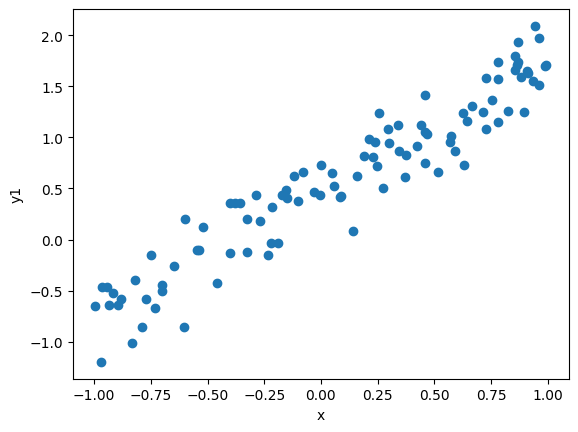

In [22]:
plt.scatter(x, y1)
plt.xlabel("x")
plt.ylabel("y1")
plt.show()

### 📢 Task 1a (3 points)📢

In class you have seen that, instead of using the closed form solutions, we can also estimate the parameters $\theta_i$ of the linear regression models by using Gradient Descent.

For the univariate linear regression model, the stochastic gradient descent updates (from step t to t+1) look like this:
* $\theta_{0}^{(t+1)} = \theta_{0}^{(t)} - \alpha (\theta_{0}^{(t)} + \theta_{1}^{(t)} x_t - y_t)$
* $\theta_{1}^{(t+1)} = \theta_{1}^{(t)} - \alpha (\theta_{0}^{(t)} + \theta_{1}^{(t)} x_t - y_t) x_t$

Here $\alpha$ is the learning rate, and $(x_t, y_t)$ is the data point sampled
at time $t$.


In the following cell, implement the `.fit` and `.predict` methods:
* In the `.predict` method, apply the model to the input `x`.
* In the `.fit` method, implement the update equations for
$\theta_0$ and $\theta_1$.

In [23]:
class SGDUnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.
    self.rng = np.random.default_rng(RANDOM_SEED)

  def predict(self, x):
    # y = theta_0 + theta_1 * x
    return self.theta_0 + self.theta_1*x  # TODO



  def fit(self, x, y, n_iter: int = 100, learning_rate: float = 1.0):
    for t in range(n_iter):
      sample_ix = self.rng.integers(0, len(x))

      xt = x[sample_ix]
      yt = y[sample_ix]
      old_theta_0 = self.theta_0
      self.theta_0 = old_theta_0 - learning_rate*(old_theta_0+self.theta_1*xt-yt)
      self.theta_1 = self.theta_1 - learning_rate*(old_theta_0+self.theta_1*xt-yt)*xt
      
    return self

📢 **<mark>On Moodle</mark>** 📢

* Hand in your code from the cell above.

### 📢 Task 1b (2 points)📢

Run SGD for `x` and the target `y1` and compute the mean squared error (MSE).
The MSE is defined as: $\frac{1}{n}\sum_{i=1}^{n} (\hat{y}_i - y_i)^2$, where
$\hat{y}$ are the model predictions.

* Create an instance of the class `SGDUnivariateLinearRegression`
* fit the model using its `.fit` method
* get the predicted values, using `.predict`
* implement the `mse` function
* compute the MSE of your predictions

In [24]:
def mse(y_pred, y_true):
  return np.mean((y_pred-y_true)**2)

In [25]:
# TODO: implement fit an predict
sgd = SGDUnivariateLinearRegression()

sgd = sgd.fit(x,y1)

y_pred = sgd.predict(x)

mse_sol = mse(y_pred, y1)
print(mse_sol)

0.23939987474527363


📢 **<mark>On Moodle</mark>** 📢
* Report the resulting Mean Squared Error

If you want to plot the resulting model, you can use the following function:

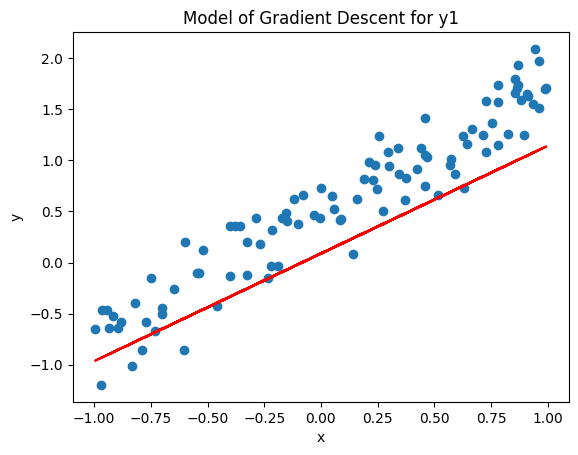

In [26]:
def plot_model(x, y_pred, y_true, title):
  plt.scatter(x, y_true)
  plt.plot(x, y_pred, c="r")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(title)
  plt.show()

plot_model(x, y_pred, y1, "Model of Gradient Descent for y1")

### 📢 Task 1c (4 points) 📢

You will now plot the learning curves of gradient descent for different learning rates $\alpha$.
A learning curves shows how a model's performance changes with increasing number of update steps.
In our case we will plot the model's MSE as a function of the number of update
steps `n_iter` for different values of `learning_rate`.


For comparison, we first implement the closed form for univariate regression from previous lab:

In [27]:
class UnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.

  def predict(self, x):
    return self.theta_0 + self.theta_1 * x

  def fit(self, x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    cent_x = x - mean_x
    cent_y = y - mean_y

    theta_1 = np.sum(cent_x * cent_y) / np.sum(cent_x * cent_x)
    theta_0 = mean_y - theta_1 * mean_x

    self.theta_1 = theta_1
    self.theta_0 = theta_0

    return self

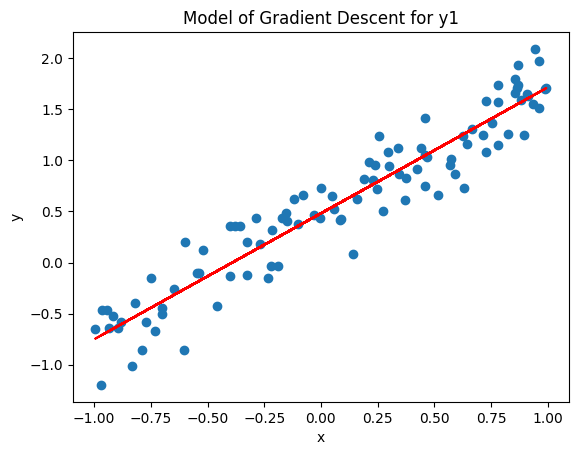

In [28]:
closed_form = UnivariateLinearRegression()
y_pred = closed_form.fit(x, y1).predict(x)


plot_model(x, y_pred, y1, "Model of Gradient Descent for y1")


In the following cell we setup most of the scaffold to create learning curves. A learning curve contains the MSE for different numbers of iterations, i.e. different number of updates of the parameters in θ.

We will draw learning curves for different values of learning rate α (don't get confused with the duplicate usage of "learning" here. The first refers to the improvement of MSE over number of iterations, while the second influences how much we change values in θ in each step).

Follow the instructions in the comments to finish the plots.

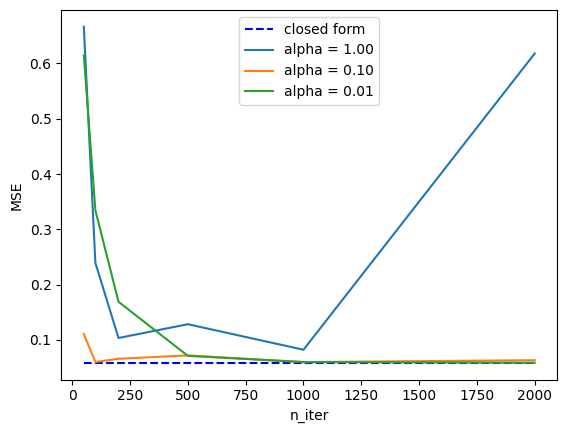

In [29]:
n_iters = [50, 100, 200, 500, 1000, 2000]
learning_rates = [1., .1, .01]

# we plot the MSE achieved by the closed form model as a reference
closed_form = UnivariateLinearRegression()
closed_form.fit(x, y1)
mse_base = mse(y_pred=closed_form.predict(x), y_true=y1)
plt.plot(n_iters, np.ones_like(n_iters) * mse_base, label="closed form", linestyle='--', c='b')

for alpha in learning_rates:
  mses = []
  for n_iter in n_iters:
    # fit a SGDUnivariateLinearRegression model using n_iter=n_iter and
    # learning_rate=alpha
    sgd = SGDUnivariateLinearRegression()
    sgd = sgd.fit(x,y1,n_iter=n_iter,learning_rate=alpha)
    y_pred = sgd.predict(x)

    mse_ = mse(y_pred, y1)
    # compute its mse and append the mse value to the mses list

    #mse_ = 1.  # replace with mse calculation
    mses.append(mse_)
  plt.plot(n_iters, mses, label=f"alpha = {alpha:.2f}")

plt.xlabel("n_iter")
plt.ylabel("MSE")
plt.legend()
plt.show()

📢 **<mark>On Moodle</mark>** 📢

* The final plot containing the 3 learning curves
* A short (2-3 sentences) interpretation of the curves: why do you think they look the way they do? Can you draw any conclusions?

In case you were not able to arrive at the final plot:

* include screenshots of the code you wrote so we can assign partial credit




# TASK 2: Polynomial Regression

We now switch to polynomial regression. First, let's create and explore some new synthetic data for this task:

In [43]:
# set the random seed to an integer, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable that has a standard normal distribution, and reshape it in order to use it for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)
print(x)

[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]
 [ 0.44386323]
 [ 0.33367433]
 [ 1.49407907]
 [-0.20515826]
 [ 0.3130677 ]
 [-0.85409574]
 [-2.55298982]
 [ 0.6536186 ]
 [ 0.8644362 ]
 [-0.74216502]
 [ 2.26975462]
 [-1.45436567]
 [ 0.04575852]
 [-0.18718385]
 [ 1.53277921]
 [ 1.46935877]
 [ 0.15494743]
 [ 0.37816252]
 [-0.88778575]
 [-1.98079647]
 [-0.34791215]
 [ 0.15634897]
 [ 1.23029068]
 [ 1.20237985]
 [-0.38732682]
 [-0.30230275]
 [-1.04855297]
 [-1.42001794]
 [-1.70627019]
 [ 1.9507754 ]
 [-0.50965218]
 [-0.4380743 ]
 [-1.25279536]
 [ 0.77749036]
 [-1.61389785]
 [-0.21274028]
 [-0.89546656]
 [ 0.3869025 ]
 [-0.51080514]
 [-1.18063218]
 [-0.02818223]
 [ 0.42833187]
 [ 0.06651722]
 [ 0.3024719 ]
 [-0.63432209]
 [-0.36274117]
 [-0.67246045]
 [-0.35955316]
 [-0.81314628]
 [-1.7262826 ]
 [ 0.17742614]
 [-0.40178094]
 [-1.63019

Visualise the data

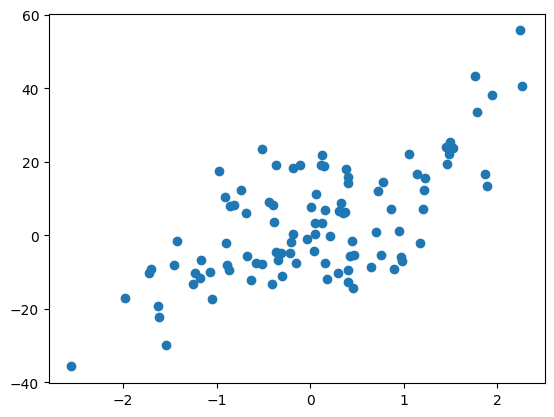

In [31]:
plt.scatter(x, y)
plt.show()

First, we try to fit a *Linear* Regression model to the data.

For this, we first split the data into a train set and a test set (80% train, 20% test data).

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

## Task 2a (1 point)
1. Apply Linear Regression on the data and predict y values for training set as well for the test set.

In [37]:
from sklearn.linear_model import LinearRegression
# TODO
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)

# lr.fit(X_test,y_test)
y_pred_test = lr.predict(X_test)

2. Calculate MSE for training as well as for test data.

In [38]:

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

print(f"MSE of training data: {mse_train}")
print(f"MSE of test data: {mse_test}")

MSE of training data: 131.3354142667106
MSE of test data: 135.783818600193


3. Visualize the model. Plot all the data points als well as the regression model when applied to the training set and to the test set (in plt.scatter, you can set the color of points e.g. to red using " color='r' ").

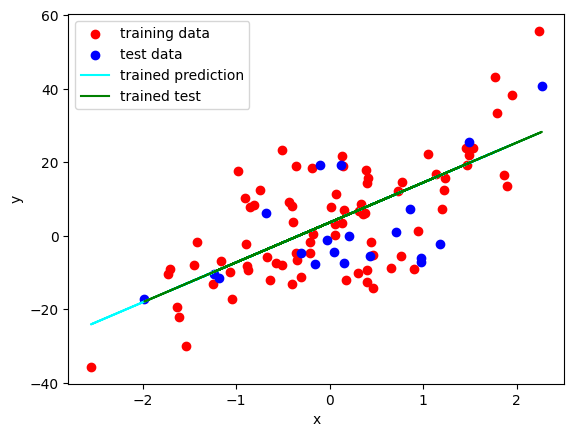

In [42]:
# TODO
plt.scatter(X_train,y_train, color='r', label='training data')
plt.scatter(X_test, y_test, color='b', label='test data')

plt.plot(X_train,y_pred_train, color='cyan', label='trained prediction')
plt.plot(X_test,y_pred_test, color='g', label='trained test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


📢 **<mark>On Moodle</mark>** 📢

Upload
* your scatter plot

## Task 2b (2 points)

You will now investigate how well polynomial regression with a polynomial of degree 2 can solve the task.




Recall that for polynomial regression, we introduce artificial variables $z_i$ and a new hypothesis $h(z) = \theta_0 z_0 + \theta_1 z_1 + \theta_2 z_2 + \theta_3 z_3 ...$, where each $z_i$ is a polynomial in $x$. One of the simplest hypothesis is quadratic, where we have $h(z) = \theta_0 z_0 + \theta_1 z_1 + \theta_2 z_2$ with $z_0 = 1, z_1 = x$ and $z_2 = x^2$.

In the following cell, implement polynomial regression with the quadratic hypothesis above, and plot the result.

In [49]:
x_poly = np.column_stack([x,x**2])
y_poly = np.column_stack([y,y])
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y_poly, test_size=0.2, random_state=RANDOM_SEED)

lr.fit(X_poly_train,y_poly_train)
y_pred_poly_train = lr.predict(X_poly_train)
y_pred_poly_test = lr.predict(X_poly_test)


Plot the result


ValueError: x and y must be the same size

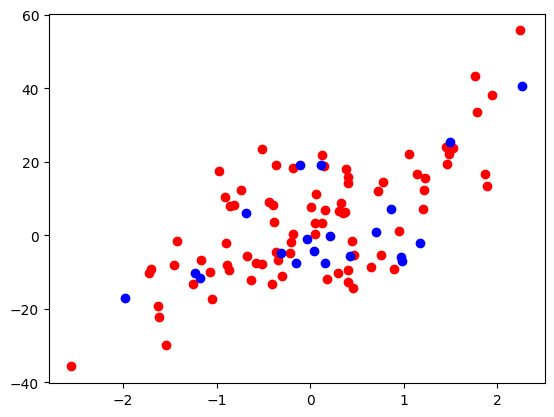

In [55]:
# TODO
#print(X_poly_train.size, y_poly_train.size)
plt.scatter(X_train,y_train, color='r', label='training data')
plt.scatter(X_test, y_test, color='b', label='test data')

# plt.scatter(X_train,y_pred_poly_train, color='cyan', label='trained prediction')
# plt.scatter(X_test,y_pred_poly_test, color='g', label='trained test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Instead of implementing the polynomial transformation by hand, we can use [PolynomialFeatures.fit_transform](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features) from sklearn, which generates the new features automatically.

1. Transform the data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_fit = poly.fit_transform(X_train, y_train)
X_test_fit = poly.fit_transform(X_test, y_test)

lr = LinearRegression()
# lr: LinearRegression = lr.fit(X_train_fit, y_train)
lr.fit(X_train_fit, y_train)

y_pred_train = lr.predict(X_train_fit)
y_pred_test = lr.predict(X_test_fit)

mse_train_poly = mean_squared_error(y_train, y_pred_train)
mse_test_poly = mean_squared_error(y_test, y_pred_test)

print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of test data: {mse_test_poly}")

MSE of training data: 129.64199704420645
MSE of test data: 128.69895330783692


Did it perform better than Linear Regression? Visualize the results.

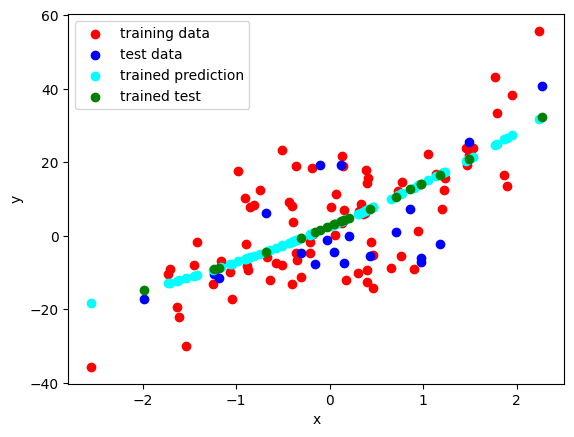

In [58]:
# TODO
plt.scatter(X_train,y_train, color='r', label='training data')
plt.scatter(X_test, y_test, color='b', label='test data')

plt.scatter(X_train,y_pred_train, color='cyan', label='trained prediction')
plt.scatter(X_test,y_pred_test, color='g', label='trained test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

📢 **<mark>On Moodle</mark>** 📢

Upload your scatter plot


## Task 2c (4 point)
Finally, we investigate the influence of the polynomial degree on the results. Consider degrees in range(0, 11). Plot MSE (on training as well as test data) depending on the polynomial degree.

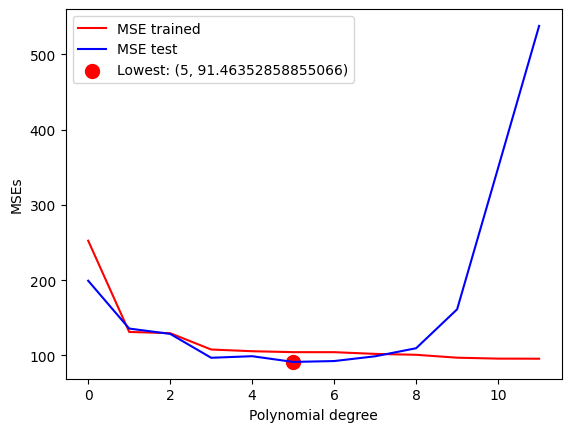

In [65]:
# TODO

# n_iters = [50, 100, 200, 500, 1000, 2000]
# learning_rates = [1., .1, .01]
# degrees = [0,1,2,3,4,5,6,7,8,9,10,11]

# we plot the MSE achieved by the closed form model as a reference
# closed_form = UnivariateLinearRegression()
# closed_form.fit(x, y1)
# mse_base = mse(y_pred=closed_form.predict(x), y_true=y1)
# plt.plot(n_iters, np.ones_like(n_iters) * mse_base, label="closed form", linestyle='--', c='b')
from sklearn.preprocessing import PolynomialFeatures

mses_train = np.zeros(12)
mses_test = np.zeros(12)
x_plot = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
lr = LinearRegression()
i = 0
while i < len(x_plot):
  poly = PolynomialFeatures(degree=x_plot[i])

  X_train_fit = poly.fit_transform(X_train, y_train)
  X_test_fit = poly.fit_transform(X_test, y_test)

  # lr: LinearRegression = lr.fit(X_train_fit, y_train)
  lr.fit(X_train_fit, y_train)

  y_pred_train = lr.predict(X_train_fit)
  y_pred_test = lr.predict(X_test_fit)

  mses_train[i] = mean_squared_error(y_train, y_pred_train)
  mses_test[i] = mean_squared_error(y_test, y_pred_test)
  i +=1

lowest_index = np.argmin(mses_test)
lowest_mse = mses_test[lowest_index]
lowest_x = x_plot[lowest_index]


plt.plot(x_plot,mses_train,color='red', label='MSE trained')
plt.plot(x_plot,mses_test, color='blue', label='MSE test')

# plt.annotate(f'Lowest: ({lowest_x}, {lowest_mse})', xy=(lowest_x, lowest_mse), xytext=(lowest_x + 1, lowest_mse + 2),arrowprops=dict(arrowstyle='->', color='red'))
plt.scatter(lowest_x, lowest_mse, color='red', marker='o', s=100, label=f'Lowest: ({lowest_x}, {lowest_mse})')

plt.xlabel("Polynomial degree")
plt.ylabel("MSEs")
plt.legend()
plt.show()

📢 **<mark>On Moodle</mark>** 📢

* Upload your plot of MSE for training and test data

* Answer the following three questions in a text:
1. What is the optimal value of the polynomial degrees?
2. Do the values of MSE training and MSE test behave similarly?
3. What happens in the models with polynomial degrees >= 8?
